# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do we know if a customer is no longer with us?
For a gym, it makes sense to say a customer has left if they don't come for a month.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.   

**Business goals:**  
•	Learn to predict the probability of churn (for the upcoming month) for each customer  
•	Draw up typical user portraits: select the most outstanding groups and describe their main features  
•	Analyze the factors that impact churn most  
•	Draw basic conclusions and develop recommendations on how to improve customer service:  
   - Identify target groups 
   - Suggest measures to cut churn  
   - Describe any other patterns with respect to interaction with customers

**Data description:** 
The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question  

**User data for the preceding month**  
- 'gender'  
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located  
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)  
- Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)  
- 'Phone' — whether the user provided their phone number  
- 'Age'  
- 'Lifetime' — the time (in months) since the customer first came to the gym   

**Data from the log of visits and purchases and data on current membership status**  
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year  
- 'Month_to_end_contract' — the months remaining until the contract expires  
- 'Group_visits' — whether the user takes part in group sessions  
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime 
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month  
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Step 1. Downloading and reading the data

In [1]:
import pandas as pd
import seaborn as sns
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
churn=pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Step 2. Exploratory data analysis

### Looking at the dataset

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

No missing values were found.

In [5]:
#Studying the data
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In many features the mean is less than 1 or very low, which means that feature values are 0-1. For majority of the features, the std is low as well. Low, or small, standard deviation indicates data are clustered tightly around the mean. The only feature which has data spread out is Avg_additional_charges_total.

Mean values in general dataset: 
- Gender: 51% are men
- 85% live or work close by.
- 49% work in partnering companies.
- 31% come with promo code.
- 90% provided phone number.
- Average contract period - 4.7 months.
- 41% attend group sessions.
- Mean age is 29. 25% are between 18 and 27 years old.
- Average additional charges are 147. The std is 96, which means there's a great variance between the users.
- On average users have a little over 4 month to the end of the contract. 
- Average lifetime is 3.7 month until users churn. 75% attend the gym 5 month before they churn.
- On average users attend the gym a little above twice a week (1.88). 75% of users attend the gym 1-3 times a week.

In [6]:
print('The overall churn rate is {:.1%}'.format(churn['Churn'].mean()))

The overall churn rate is 26.5%


### Mean feature values
Let's look at the mean feature values in two groups: for those who left (churn) and for those who stayed.

In [7]:
churn.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


**When looking at the data, we can conclude the following:**  

- Gender: There's no differnce between man and women in churn rate. About 51% of both men and women churn.  
- Near_Location: there's a significant difference between those who live/work far from the gym and those who live/work close by. 87% of those who live/work far churn, as opposed to 77% of those, who live/work close by.
- Partner: there's a significant difference between those who work in partner companies and those who don't. Over half of the user who don't come from partner organizations, churn, as opposed to 36% of those who do. This can be explained by assumption, that colleagues come to work out together, and thus motivate each other.
- Promo_friends: there's a significant difference between those who joined the gym with "bring a friend" offer and those who didn't. 35% of those, who didn't join as "bring a friend" offer, churn, as opposed to only 18%, who did.
- Phone: phone feature doesn't seem to have any impact on the churn, as it is identical for both groups.
- Contract_period: the contract period from those who didn't churn is significantly longer (almost 6 month) comparing to those who churned (1.7 month).
- Group_visits: group visits have an impact on churn as well. 46% of those who didn't churn, attended group sessions, as opposed to 27% of those who churned.
- Age: Those who stay, are slightly older on average (30 vs 27).
- Avg_additional_charges_total: those who stay, spend sigificantly more money on average on additional changes. 
- Month_to_end_contract: Those who stay, tend to have more months to the end of the contract (5 month vs 1.7). This is coherent with the contract period. Users who stay, tend to have longer contracts.
- Lifetime: Those who stay, tend to have longer lifetine in the gym (5 months vs 1).
- Avg_class_frequency_total and Avg_class_frequency_current_month: Those who stay, tend to attend the gym more times within one week (2 times on average vs 1.5).   

### Bar histograms and feature distributions for those who left (churn) and those who stayed

In [8]:
def feat_dist(feature):
    """
    The function will plot histograms and feature distribututions. It will plot bar plots for categorical features 
    'gender','Near_Location','Partner','Promo_friends','Phone','Group_visits', showing churn rate by feature.
    For the rest of the features it will plot a histogram. It will also give a title to each plot and explain the values.
    """
    plt.figure(figsize = (7,6))
    if feature in ['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']:
        ##plotting bar chart
        sns.barplot(data=churn, x=feature, y="Churn")
        if feature=='gender':
            plt.xlabel('{}: 0-female, 1-male'.format(feature))
        else:
            plt.xlabel('{}: 0-no, 1-yes'.format(feature))
        plt.ylabel('Churn rate')
    else:   
        ##plottimg histogram 
        plt.figure(figsize = (7,6))
        sns.histplot(data=churn, x=feature, hue='Churn');
        plt.ylabel('Churn count')
    
    plt.title('Distribution of churn by {}'.format(feature))      
    plt.show();

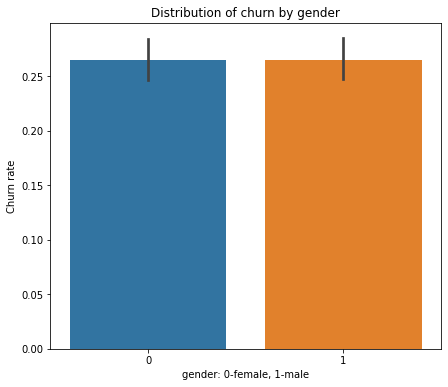

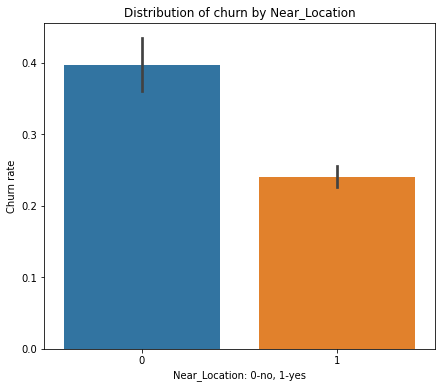

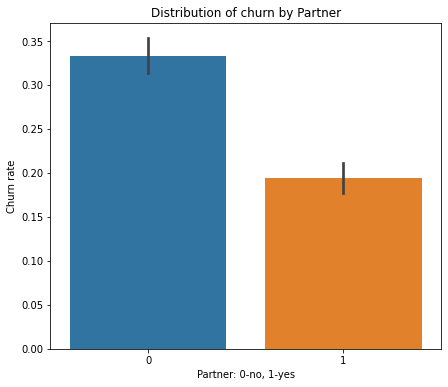

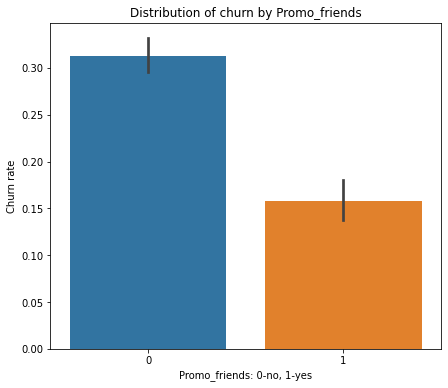

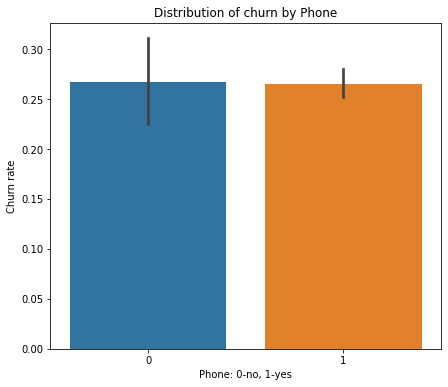

<Figure size 504x432 with 0 Axes>

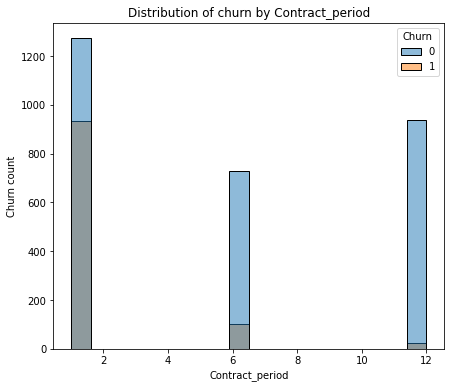

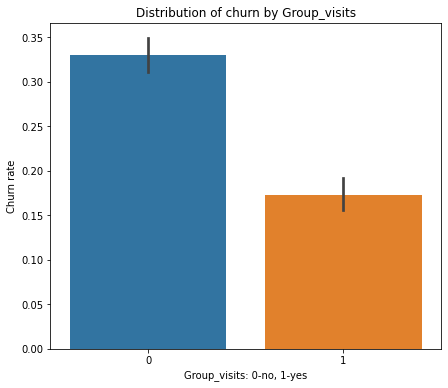

<Figure size 504x432 with 0 Axes>

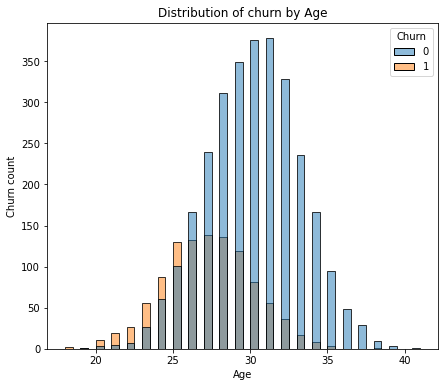

<Figure size 504x432 with 0 Axes>

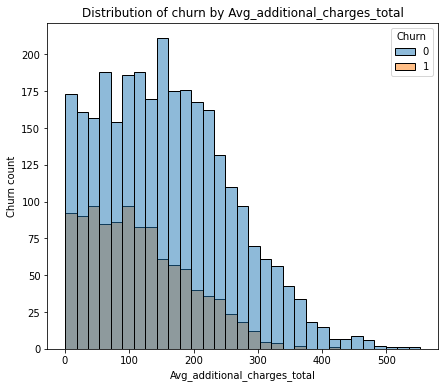

<Figure size 504x432 with 0 Axes>

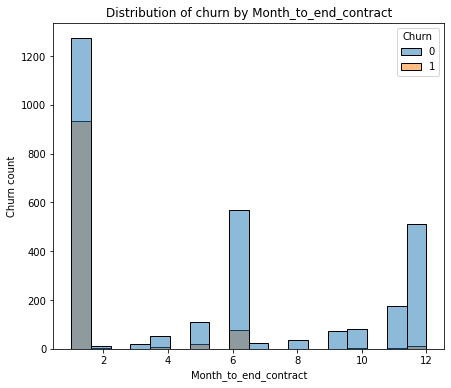

<Figure size 504x432 with 0 Axes>

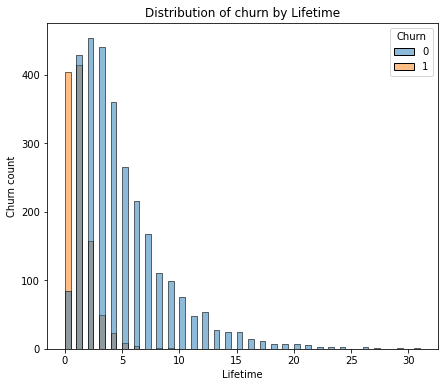

<Figure size 504x432 with 0 Axes>

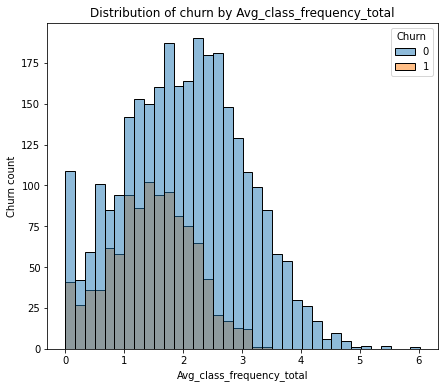

<Figure size 504x432 with 0 Axes>

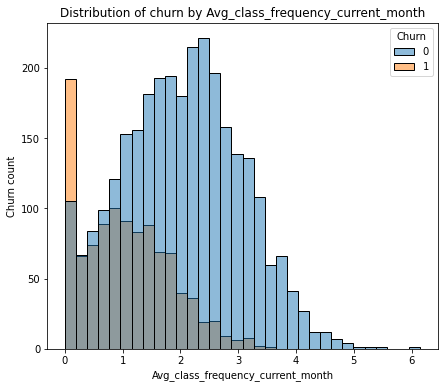

In [9]:
for i in churn.columns:
    if i=='Churn':
        continue
    else:
        feat_dist(i);

**Preliminary conclusions:**  

- Gender: We see that there's no difference in churn rate bewteen men and women.
- The overwhelming majority of users who come to the gym work or live close by. 40% of the users who don't live or work close by, churn, as opposed to about 25% of those who do.
- Rather large percentage of those, who come to the gym, come from partnering companies. 33% of the users who don't work in partnering organizations, churn, as opposed to less than 20% of those who do. 
- The majority of users who come to the gym don't come through "bring a friend" offer. Over 30% of the users who didn't come through the "bring a frind" offer, churn, as opposed to about 15% of those who did. 
- The majority of users do provide their phone number.  There's no difference in churn rate between those who provide the phone number and those who don't.
- Rather large % the gym users make rather short contracts - maybe a trial. The % of those who churn among those is very high and the highest. The % of those who churn among those who make long contracts is the lowest.   
- The majority of users who come to the gym  don't attend group sessions. The churn rate among those who don't attend is about 33%, comparing to about 17% among those, who do attend group sessions.
- User who stay tend to be older, compating to users who churn.
- Those who stay, spend sigificantly more money on average on additional changes.  
- On the last month of the contract users tend to leave the most. In fact, about 70% of users leave when they have 1 month left to the end of the cotract.  
- The majority of churn happens on 1st and 2nd months of users' lifetime. The longer users stay, the less they tend to churn.  
- On average, users attend the gyp twice a week. Among those who stay, there're ouliers who tend to attend the gym more times. 

### Correlation matrix 

In [10]:
corr_m = churn.corr()
print(corr_m)

                                     gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.04

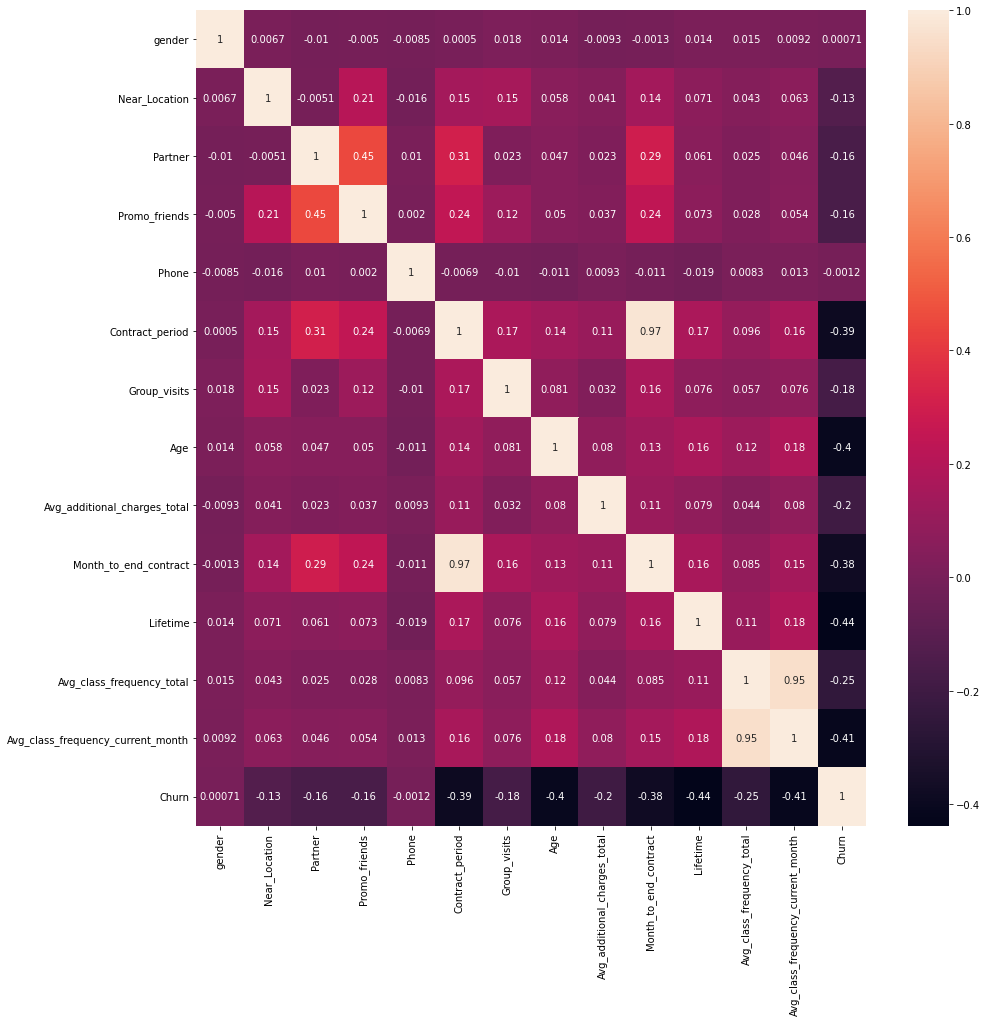

In [11]:
plt.figure(figsize = (15,15))
sn.heatmap(corr_m, annot=True)
plt.show()

From the correlation matrix, we can see that there are two pairs of features which have very strong correlation within each other: 
- 'Month_to_end_contract' and 'Contract_period'
- 'Avg_class_frequency_current_month' and Avg_class_frequency_total'

This means that both of the features in each pair equally predict the churn. In order not to have an extra weigt of the values, we will get rid off one of the features in each pair.

In [12]:
churn = churn.drop(columns=['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1)
churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


## Step 3. Building a model to predict user churn

### Building binary classification model for customers where the target feature is the user's leaving next month.

In [13]:
# divide the data into features (the X matrix) and a target variable (y)
X = churn.drop('Churn', axis=1)
y = churn['Churn']

In [14]:
#Dividing the data into train and validation sets using the train_test_split() function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the model

We will train the model on two methods:
- Logistic regression  
- Random forest

Since we need to predict whether a client will churn or not from the gym, we are dealing with binary classification, where there are only two classes: "0" or "1". The target variable here is a binary variable, just like Churn column values.

**Decision Trees**  

In general, decision trees use scenarios to select an answer, when the classification is binary: 0 or 1, and there are a number of factors that need to be taken into account. 
The algorithm uses the sequence of features to split the set in such a way that the groups at the end of the tree are as distinct as possible based on the data at our disposal.
The trees are easy to interpret, and in business this is often the key factor. They work with both classification and regression. 
If one has solved a binary classification problem with the decision-tree-based model m_1. You've gotten the value roc_auc_score_1 = 0.8. However, all models are prone to overfitting, so an algorithm that works well for observations and features from the train set can make large errors with the validation data. We can create another model, m_2, that will make up for the errors of the first model. By itself, it might yield a relatively low roc_auc (say, roc_auc_score_2=0.79). Then you could change the conditions once again and build another model, m_3, and so on up to m_n. Each of the n models will be different, sensitive to different factors and conveying unique information about the observations. You can try to account for all of them at the same time and make a consolidated model, M, that will yield better results than each model taken separately (e.g. roc_auc_score = 0.91). Such a model is said to be strong ("a strong classifier"), while the models on which it's based are weak ("weak classifiers").

**Random Forest:**  

One of the ensembles of Decision Trees is Random Forest. Ensembles are powerful machine learning models, which help uncover complex relations within data. The first type of ensemble is called random forest - a consolidated algorithm consists of a plethora of trees. A tree algorithm can split samples differently based on features and create different scenarios leading to final answers on the tree's leaves. An extra way to get different trees is to pass them **random** subsets from the original train set as input data. You can add still more variation by taking different sets of n fixed features for each tree.
That's how the random forest algorithm actually works. It generates many mutually independent trees in slightly different ways (taking different subsets or features) and reaches a final decision based on their answers. The random forest algorithm averages the responses of all trees (in regression) or uses voting (in classification) to select the answer that most of the trees determine to be true. The trees are trained in parallel, or independently of one another. The training of each tree doesn't depend on the results of others.
In sklearn, random forests are implemented in the ensemble module. The module's most popular algorithms are RandomForestClassifier() and RandomForestRegressor(). Since we are solving a classification problem, we will apply RandomForestClassifier().


**Logistic Regression**  

This is another algorithm for solving binary classification tasks. Models trained with binary classification algorithms can not only predict the final value of a class for a certain object or client, but also estimate the probability of the event in question. In our case, the probability that a customer will quit using the gym (churn).
A common algorithm for solving such tasks is logistic regression. It's implemented as the LogisticRegression() class inside the sklearn linear_model module, alongside a linear regression algorithm. The graph of the logistic function is called a sigmoid curve. The graph shows that the function takes values from 0 to 1. The sigmoid's form and tolerance range are really good for representing the probability of some event's occurrence. This line "curves" on infinitely great and infinitely small z values. If the weighted sum has high values, for which the probability of event occurrence is, say, 0.95, further increases in these features won't make this high probability significantly higher. As features increase, it approaches 1. For small probabilities, it approaches 0. When we are working on a binary classification task using logistic regression, we transform linear regression to find the probability that an event enters class 1. That's why logistic as well as linear regressions belong to linear models. It can be found in the same linear_model module of the sklearn library.
To make a prediction for a class after training such a model, you'll need the predict() method.
And to obtain the probability that an object enters the first or the second class, use the predict_proba() method.

#### Logistic regression

In [15]:
#Declaring and training the model
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
# using the trained model to make forecasts
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

# binary prediction
lr_predictions = lr_model.predict(X_test)

#### Random Forest

In [17]:
#Declaring and training the model:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
# using the trained model to make forecasts
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

# binary prediction
rf_predictions = rf_model.predict(X_test)

### Evaluating accuracy, precision, and recall

   **Accuracy** is the share of accurate predictions among all predictions. The closer we are to 100% accuracy, the better.
Accuracy only works when classes are balanced, i.e. when objects are distributed almost evenly between the classes, approximately 50/50. In our case, the proportion is 26/74, which indicates an imbalance. In cases like this, you should use other metrics to evaluate the model.
   
   To evaluate a model without looking at the balance of classes, we will calculate the metrics **precision** and **recall**. Precision tells us what share of predictions in class 1 are true. In other words, we look at the share of correct answers only in the target class. In business, this metric is needed only when each alert of the model (an instance when an object gets placed in class 1) costs resources.
The second metric aims at minimizing the opposite risks. Recall demonstrates the number of real class 1 objects we are able to discover with the model.
Each metric takes values from 0 to 1. The closer to 1, the better.
Since precision and recall are aimed at avoiding opposing risks, we need a harmonizing metric that takes into account the balance between the metrics. This metric is the **F1 score**. The function also returns a value between 0 and 1. The closer to 1, the better.

In [19]:
#Evaluating Random Forest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.78
Recall: 0.77
F1: 0.78


In [20]:
#Evaluating Logistis Regression
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Accuracy: 0.87
Precision: 0.73
Recall: 0.77
F1: 0.75


As we see, Random Forest model is slightly better in predicting the churn.

## Step 4. Creating user clusters

### Setting aside the column with data on churn and identify object (user) clusters:

In [21]:
#Standardizing the data
# training StandardScaler on the train set
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

### Matrix of distances

We will build a matrix of distances using the linkage() function based on the standardized feature matrix and plot a dendrogram. 

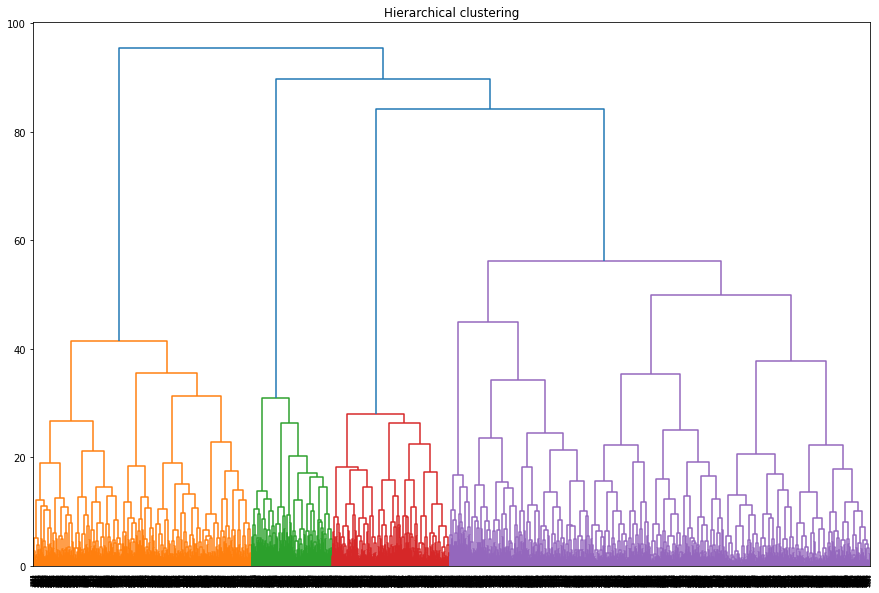

In [22]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show() 

We can identify 5 clusters.

### Training the clustering model with the K-means algorithm

We will now train the clustering model with the K-means algorithm and predict customer clusters. We will set the number of clusters be n=5.

In [23]:
# defining the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predicting the clusters 
labels = km.fit_predict(X_sc)

# storing cluster labels in the field of our dataset
churn['cluster_km'] = labels

### Mean feature values for clusters

In [24]:
churn.groupby(['cluster_km']).mean().T.reset_index()

cluster_km,index,0,1,2,3,4
0,gender,0.492569,0.542237,0.523316,0.499109,0.502024
1,Near_Location,0.994692,1.000000,0.862694,0.000000,1.000000
2,Partner,0.949045,0.254566,0.471503,0.488414,0.302834
3,Promo_friends,0.995754,0.078767,0.305699,0.076649,0.053441
4,Phone,1.000000,1.000000,0.000000,1.000000,1.000000
5,Contract_period,7.177282,4.570776,4.777202,3.032086,3.574899
6,Group_visits,0.505308,1.000000,0.427461,0.235294,0.000000
7,Age,29.512739,29.544521,29.297927,28.721925,28.852632
8,Avg_additional_charges_total,153.009972,148.258140,144.208179,137.540009,146.510999
9,Lifetime,4.334395,3.842466,3.940415,3.060606,3.410526


**Cluster 0:** 
   - 52% are male, average age is 29 years old. 86% live or work close by, 47% work in partnering companies, 31% signed up to the gym with friend's promo code. None of the users in this cluster provided a phone number. The average contract period is 4.7 month, which is average. 42% attended group sessions - close to average. Average additional spendings 144 - a little less than overall average. The average lifetime is 3.9 months, very close to average. They attend the gym 1.85 times a week on average - slightly less than overall average.
   
**Cluster 1:**
 - 51% are male, average age is 28 years old. 86% live or work close by, 19% work in partnering companies, only about 6% signed up to the gym with friend's promo code. All of the users in this cluster provided a phone number. The average contract period is about 2 month, which much lower than the average. 31% attended group sessions - lower than average. Average additional spendings 124 - significantly less than overall average. The average lifetime is a little over 2 months - lower than average. They attend the gym 1.55 times a week on average - less than overall average. In fact, this cluster has the highest churn rate - 49%.
 
**Cluster 2:**
 - A little less than 50% are male, average age is 29.5 years old. Almost all live or work close by, 90% work in partnering companies, almost all signed up to the gym with friend's promo code. All of the users in this cluster provided a phone number. The average contract period is about 7 month, which much higher than the average. 52% attended group sessions - much higher than average. Average additional spendings 152 - higher than overall average. The average lifetime is a little over 4 months - a little higher than average. They attend the gym roughly two times a week every week - higher than overall average. In fact, this cluster has one the lowest churn rate - 13%.
 
**Cluster 3:**
 - 50% are male, average age is 28 years old. None live or work close by, 49% work in partnering companies, only about 8% signed up to the gym with friend's promo code. All of the users in this cluster provided a phone number. The average contract period is about 3 month, which lower than the average. Only 23% attended group sessions - significantly lower than average. Average additional spendings 137 - significantly less than overall average. The average lifetime is aabout 3 months - lower than average. They attend the gym 1.76 times a week on average - a little less than overall average. In fact, this cluster has second highest churn rate - 40%.
 
**Cluster 4:**
 - About 53% are male, average age is about 31 years old. Almost all live or work close by, 44% work in partnering companies, only 1% signed up to the gym with friend's promo code. All of the users in this cluster provided a phone number. The average contract period is 7 month, which much higher than the average. 53% attended group sessions - much higher than average. Average additional spendings 180 - significantly higher than overall average. The average lifetime is about 6 months - higher than average. They attend the gym more than two times a week every week - higher than overall average. In fact, this cluster has the lowest churn rate - only a little over 1%.

### Distributions of features for the clusters

Let's plot distributions of features for the clusters. We will create list of features and create subplots for each feature.
For categorical feature we will plot bar plots and for the rest - histograms. The plots will show feature distribution by cluster.

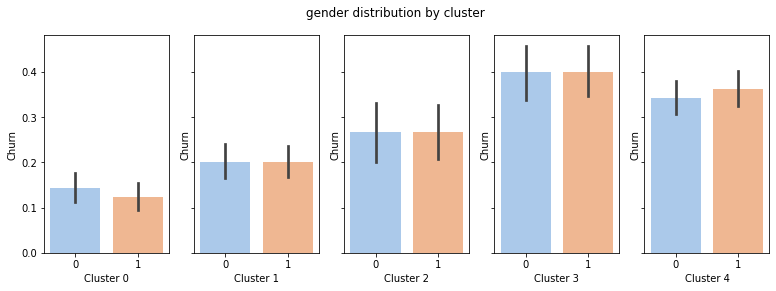

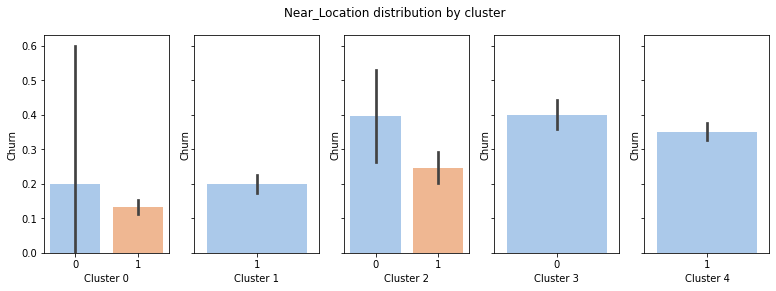

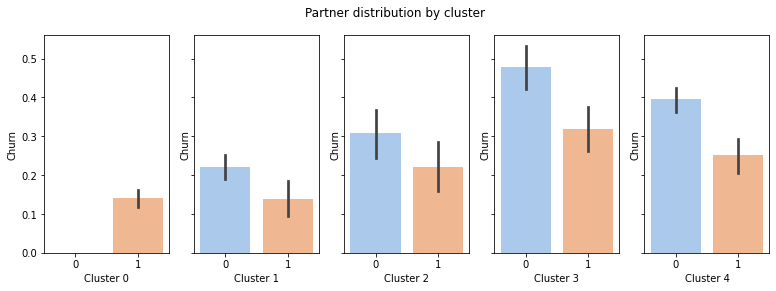

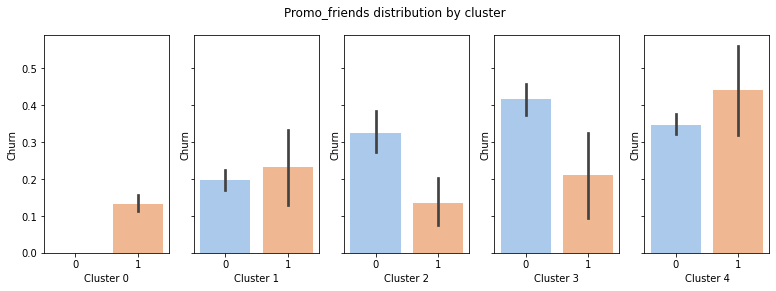

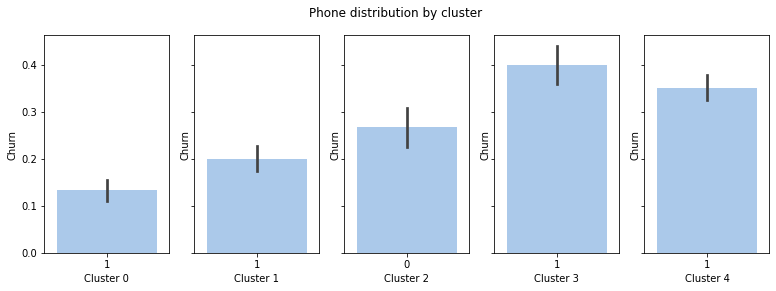

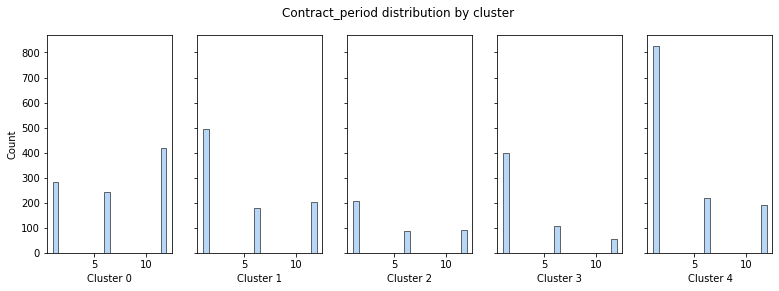

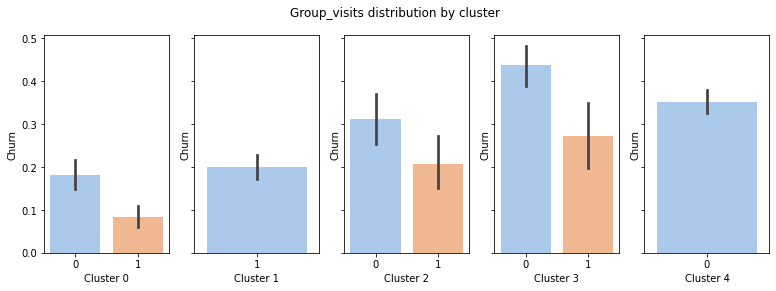

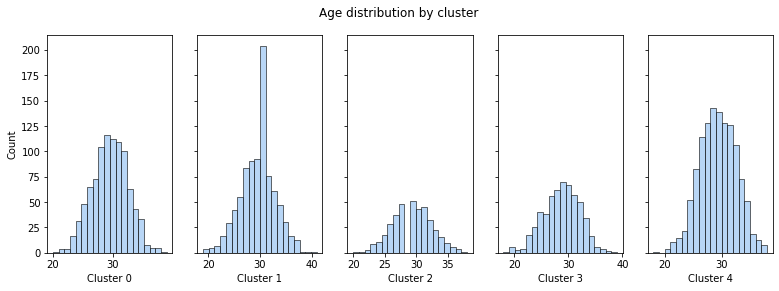

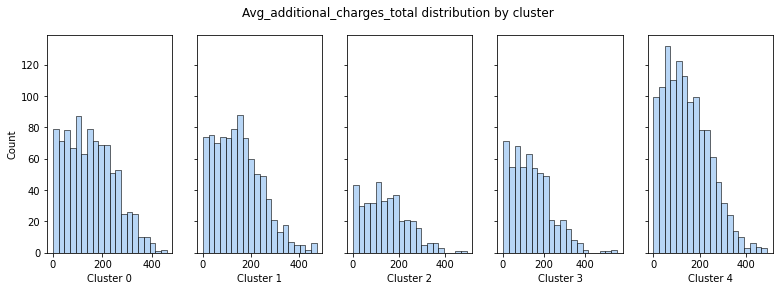

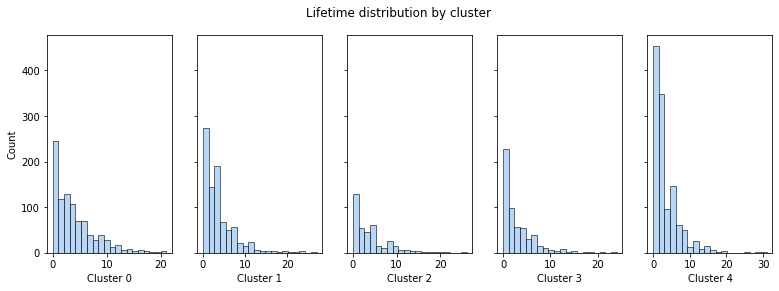

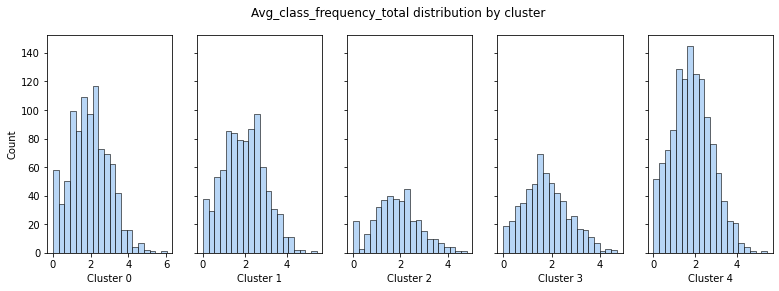

In [25]:
sns.set_palette("pastel")
for feature in list(churn.drop(['Churn', 'cluster_km'], axis=1).columns):
    fig, axes = plt.subplots(1, 5, sharey=True, figsize=(13, 4))
    
    for k in list(range(5)):
        ax = axes[k]
        cluster_= churn[churn['cluster_km'] == k]
        if feature in ['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']:
            sns.barplot(data=cluster_, x=feature, y="Churn",ax=ax)
        else:
            sns.histplot(data=cluster_, x=feature, bins=20, ax=ax)
        ax.set_xlabel(f'Cluster {k}')
    
        fig.suptitle('{} distribution by cluster'.format(feature));

**Cluster 0:** There's equal churn rate for men and women in cluster 0 (about 40%). 40% of those who leave far away, churn, as opposed to none among those who live or work close by. Those who don't work in partnering companies almost don't churn, as opposed to about 15% among those who do. About 13% of those, who came through promo code, churn, as opposed to almost 0% among those who didn't. About 13% of those who provided the phone number, churned. Significant % of users in this cluser signed long-term contract - 12 months. About 10% of those, who attended group sessiosn, churn, as opposed to about 18% of those, who didn't. The mean age is about 28. The range is between 20-27. The majority spend on average below 200. There's some ouliers on the right. Large proportion churn after 2-3 months. Users on average attend over two times a week. The distribution is skewed to the right.

**Cluster 1:** Women are slightly more prone to churn: about 15% of them do, comparing to about 13% among men.
The churn rate among those who work or live close by, is 20%. Over 20% of those, who don't work in partnering companies, churn, as opposed to about 15% among those who do. About 25% of those, who came through promo code, churn, as opposed to almost 20% among those who didn't. About 20% of those who provided the phone number, churned. Significant % of users in this cluser signed short-term contract - 2 months. About 20% of those, who attended group sessiosn, churned. The mean age is about 32.There's significant number of users are 30-32. The range is between 18-41. Average additional charges ar abou 180. There's some ouliers on the right. Large proportion churn after 4-5 months. Users on average attend over two times a week. The distribution is slightly skewed to the right.

**Cluster 2:** In cluster 2 the churn rate is very low for both men and women. 40% of those, who don't work or live close by, churn, comparing to about 25% among those who do. 30% of those, who don't work in partnering companies, churn, as opposed to about 20% among those who do. About 15% of those, who came through promo code, churn, as opposed to about 30% among those who didn't. About 25% of those who provided the phone number, churned. Significant % of users in this cluser signed short-term contract. About 20% of those, who attended group sessiosn, churned, as opposed to about 30% of those, who didn't. The mean age is about 30. The range is between 20-37. Average additional charges are about 180. Large proportion churn after 2-3 months. Users on average attend less than two times a week. The distribution is skewed to the right.


**Cluster 3:** The churn rate is the highest for both men and women: 50% of women and about 53% of men churn. 40% of those, who don't work or live close by, churn. About 50% of those, who don't work in partnering companies, churn, as opposed to about 30% among those who do. About 20% of those, who came through promo code, churn, as opposed to over 40% among those who didn't. About 40% of those who provided the phone number, churned. Vast majority of users in this cluser signed short-term contract. Over 40% of those, who attended group sessiosn, churned, as opposed to about 27% of those, who didn't.The mean age is about 28. The range is between 18-40. The median additional charges are below overall average, however, due to the outliers, the average is rather high. Large proportion churn after 2 months. Users on average attend less than two times a week. The distribution resembles normal.


**Cluster 4:**  There's no difference in churn rate between men and women: about 27% of both genders churn.  The churt rate of those who don't live or work close by, is about 35%, as opposed to about 0% among those, who do. About 40% of those, who don't work in partnering companies, churn, as opposed to about 25% among those who do. About 45% of those, who came through promo code, churn, as opposed to almost 35% among those who didn't. About 35% of those who provided the phone number, churned. Vast majority of users in this cluser signed short-term contract. Over 35% of those, who didn't attend group sessiosn, churned. The mean age is about 27. The range is between 18-37. Average additional charges are about 160. The largest proportion churn after 2-3 months, however, some users in this cluster have the longest lifetime (over 30 months) among other clusters. Users on average attend about two times a week.The distribution resembles normal.


### Calculating the churn rate for each cluster

In [26]:
churn.groupby(['cluster_km'])['Churn'].mean().reset_index()

,cluster_km,Churn
0,0,0.132696
1,1,0.199772
2,2,0.266839
3,3,0.399287
4,4,0.351417


The churn rate is the highest for cluster 1 - almost 50%.   
For cluster 3 the churn is 40%.  
For cluster 0 the churn is 27%.  
For cluster 2 the churn is 13%.   
For cluster 4 the churn is the lowest - a little over 1%.

## Step 5. Conclusions and basic recommendations on working with customers

conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

### General conclusions: 

   **Lowest churn: Cluster 4**
This cluster can be summaraized as following: the majority are male users. They tend to churn less. Olders users who live or work close by in partering organizations are less prone to churn. They tend to make longer contracts with the gym, and the opposite - those who make longer contracts, tend to churn less. Attending group sessions has a positive impact on tendency to stay in the gym. So are the average additional spendings. The lifetime of this cluster is significantly longer than average. The attendance frequency is higher as well. 


   **Highest churn: Cluster 1:**
This cluster can be summaraized as following: The users are younger on average (28 years old), some (significant percent) live or work far away from the gym, and only minority work in partnering organizations and/or came via promo offer. Their contacts are short (about 2 months), and so their average lifetime. Only less than third attend group classes. Average additional spendings are lower than average. They tend to attend the gym less than twice a week on average.


### Recommendations regarding the strategy for customer interaction and retention

**Principals:**
1. The first two months and the last month of the contract are critical. Users tend to churn more during these month.
2. The longer the contract, the less users tend to churn.
3. The more users attend group sessions, the less they tend to churn.
4. Users who come from partnering organizations, tend to churn less. 
5. Users who work or live close by, tend to churn less. 
6. Older users tend to churn less.

**Strategy recommendations:**
1. Making parnerships with companies who's offices are located in close proximity from the gym. The employees will tend to stay longer, come with their colleagues to group sessions before work, during lunch time, or right after work.
2. The gym should have group sessions available in the morning, during lunch time, and after 16:00-17:00 pm, so users could join the session before work, during lunch time, and straight after work.
3. If the user contract is short, the users should be incourages to join group sessions more. This will allow them to build community and stay longer in the gym. 
4. Last month of the contract users who be offered some additional benefits and discounts on prolonging the contract.
5. New users should be encourages to commit to longer contracts. With that some benefits should be offered to encourage them to do so, like free coffee, athletic goods, cosmetics, massages, etc.
